In [6]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

# Thinkful Unit 3, Lesson 2
Challenge: If a tree falls in the forest...

Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.


# Decision Tree

Data: Online News Popularity (https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)

Prediction: Popular (>1400 Shares) or Unpopular (<=1400 Shares)


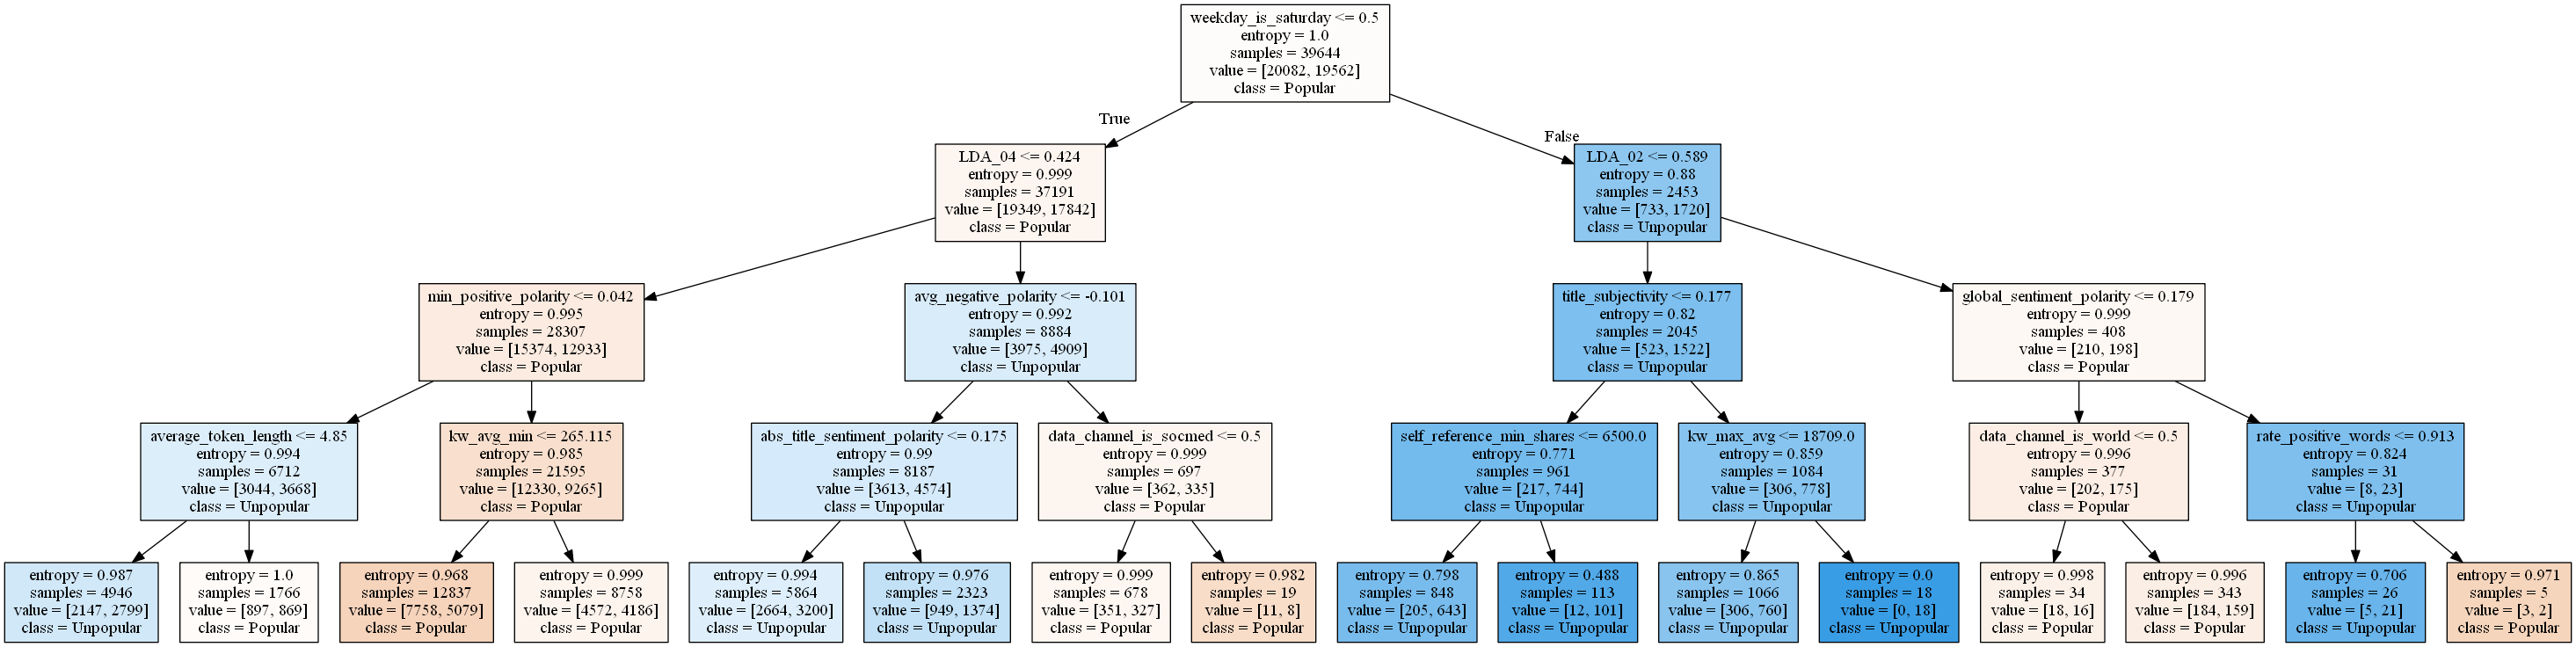

In [7]:

data = pd.read_csv('onp.csv')
data = data.rename(columns=lambda x: x.strip())

def share_fun(row):
    if row['shares'] > 1400:
        return 1
    if row['shares'] <= 1400:
        return 0


data['shares_binary'] = data.apply(lambda row: share_fun(row), axis=1)
data['shares_rate'] = data['shares']/data['timedelta']

data = data.drop(['url', 'n_non_stop_words', 'n_non_stop_unique_tokens',
                    'kw_max_max', 'kw_avg_max', 'kw_min_avg'], 1)

features=data.columns[7:54]
X = data[features]
Y = data['shares_binary']

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 24
)
decision_tree.fit(X, Y)

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=features,
    class_names=['Popular', 'Unpopular'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [8]:
cross_val_score(decision_tree, X, Y, cv=10)

array([0.55874937, 0.55572365, 0.55575177, 0.54515641, 0.57240161,
       0.57694248, 0.59031282, 0.57669021, 0.57063572, 0.58753784])

# Random Forest 

In [2]:
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X, Y, cv=10)

c:\users\mango\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\mango\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\mango\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\mango\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

array([0.50832073, 0.57942511, 0.60292634, 0.61200807, 0.61125126,
       0.62991927, 0.62588295, 0.6314329 , 0.62361251, 0.62260343])